In [2]:
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import ticker
from scipy.interpolate import interp1d

from gwaxion import physics
from gwaxion.horizon import find_horizon_range

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)

/home/misi/.local/lib/python2.7/site-packages/pandas/__init__.py:25: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas import hashtable, tslib, lib
/home/misi/.local/lib/python2.7/site-packages/pandas/__init__.py:25: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from pandas import hashtable, tslib, lib
/home/misi/.local/lib/python2.7/site-packages/pandas/core/common.py:13: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  import pandas.algos as algos
/home/misi/.local/lib/python2.7/site-packages/pandas/core/common.py:13: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  import pandas.algos as algos
/home/misi/.local/lib/python2.7/site-packages/pandas/indexes/base.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

In [3]:
from matplotlib import cm

## Colormap

In [4]:
# create an array of BH masses

n_mass = 5000
n_chi = 1000
n_alpha = 2000

distance = 5E6 * physics.PC_SI

mbhs_array = np.linspace(1, 1E4, n_mass)
chis_array = np.linspace(1E-4, 1, n_chi)

alphas = np.linspace(0, 0.5, n_alpha)

df_list = []


dfpath = 'peak.hdf5'
if os.path.exists(dfpath):
    df_max = pd.read_hdf(dfpath, 'table', mode='r')
else:
    rows = []
    for mbh in mbhs_array:
        for chi in chis_array:
            h0s, fgws = physics.h0_scalar_brito(mbh, alphas, chi_i=chi, d=distance)
            hmax = np.nanmax(h0s)
            fmax = fgws[h0s==hmax][0]
            amax = alphas[h0s==hmax][0]
            rows.append({'mbh': mbh, 'chi': chi, 'h0': hmax, 'fgw': fmax, 'alpha': amax})
    df_max = pd.DataFrame(rows)
    df_max.to_hdf('peak.hdf5', 'table', mode='w')

/home/misi/.local/lib/python2.7/site-packages/tables/__init__.py:93: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .utilsextension import (
/home/misi/.local/lib/python2.7/site-packages/tables/file.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import hdf5extension
/home/misi/.local/lib/python2.7/site-packages/tables/link.py:33: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import linkextension
/home/misi/.local/lib/python2.7/site-packages/tables/table.py:28: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import tableextension
/home/misi/.local/lib/python2.7/site-packages/tables/index.py:33: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import indexesextension


In [5]:
print df_max.head()
print df_max.tail()

     alpha       chi        fgw            h0  mbh
0  0.00025  0.000100  16.164330 -2.084442e-49  1.0
1  0.00025  0.001101  16.164334  2.324040e-50  1.0
2  0.00050  0.002102  32.328668  2.983916e-48  1.0
3  0.00075  0.003103  48.493001  5.114043e-47  1.0
4  0.00075  0.004104  48.493038  5.568913e-46  1.0
            alpha       chi       fgw            h0      mbh
4999995  0.325163  0.995996  2.133077  2.110833e-22  10000.0
4999996  0.325913  0.996997  2.138113  2.135254e-22  10000.0
4999997  0.326913  0.997998  2.144597  2.159968e-22  10000.0
4999998  0.327914  0.998999  2.151085  2.184978e-22  10000.0
4999999  0.328664  1.000000  2.156135  2.210290e-22  10000.0


In [6]:
h0_bound = df_max[(df_max['mbh']>10) & (df_max['mbh']<1E3)]['h0']
print h0_bound.min()
print h0_bound.max()

-2.082565311167164e-46
2.2083002202496464e-23


In [7]:
# # colormap for peak h0 vs chi vs M

# h0s = df_max['h0']
# hmax_ma = np.ma.masked_array(h0s, mask=(h0s<=0)|(np.isnan(h0s)))

# hmin, hmax = 1E-30, hmax_ma.max()
# norm = matplotlib.colors.LogNorm(vmin=hmin, vmax=hmax)

# fig, ax = plt.subplots(1, figsize=(11,8))

# # plot contours
# cm = ax.hexbin(df_max['mbh'], df_max['chi'], C=hmax_ma, cmap='magma', norm=norm,  xscale='log')

# # plot vertical line at 60 Msun
# ax.axvline(60, c='w', ls=':', lw=2)
# ax.axhline(0.7, c='w', ls=':', lw=2)

# # add colorbar
# #b_ticks = np.logspace(hmin, hmax, 7) # np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
# cb = plt.colorbar(cm, norm=norm, label=r'Peak $h_0$ (5 Mpc)')#, ticks=cb_ticks)
# cb.ax.tick_params(labelsize=18) 

# plt.ylabel(r'$\chi$')
# plt.xlabel(r'$M$ $(M_\odot)$')
# ax.patch.set_facecolor("grey")

# plt.xlim(30, 1E4)
# plt.ylim(0, 1)

# ax.tick_params(axis='both', color='0.4', which='both', width=2)
# ax.tick_params(axis='both', length=10)

# cm.set_rasterized(True)

# fig.savefig('cmap_chi_mbh_h0max.pdf', bbox_inches='tight', dpi=400)

# plt.show()
# plt.close()


In [8]:
# # colormap for peak fgw vs chi vs M

# fs = df_max['fgw']
# fmax_ma = np.ma.masked_array(fs, mask=(fs<=0)|(np.isnan(fs)))

# fmin, fmax = fmax_ma.min(), fmax_ma.max()
# norm = matplotlib.colors.LogNorm(vmin=fmin, vmax=fmax)

# fig, ax = plt.subplots(1, figsize=(11,8))

# # plot contours
# cm = ax.hexbin(df_max['mbh'], df_max['chi'], C=fmax_ma, cmap='magma', norm=norm,  xscale='log')

# # plot vertical line at 60 Msun
# ax.axvline(60, c='w', ls=':', lw=2)
# ax.axhline(0.7, c='w', ls=':', lw=2)

# # add colorbar
# #b_ticks = np.logspace(hmin, hmax, 7) # np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
# cb = plt.colorbar(cm, norm=norm, label=r'Peak $f_{\rm GW}$ (Hz)')#, ticks=cb_ticks)
# cb.ax.tick_params(labelsize=18) 

# plt.ylabel(r'$\chi$')
# plt.xlabel(r'$M$ $(M_\odot)$')
# ax.patch.set_facecolor("grey")

# plt.xlim(30, 1E4)
# plt.ylim(0, 1)

# ax.tick_params(axis='both', color='0.4', which='both', width=2)
# ax.tick_params(axis='both', length=10)

# cm.set_rasterized(True)

# fig.savefig('cmap_chi_mbh_fmax.pdf', bbox_inches='tight', dpi=400)

# plt.show()
# plt.close()

## Range

The range is the source distance for which the peak amplitude at Earth is equal to our "minimum detectable" one:

$d_{\rm max} = \frac{h^{\rm max}_0}{h^{95}_0} d_{\rm ref} $ and $h^{95}_0(f) = h^{95}_{\rm ref} \sqrt{\frac{S_{\rm ref}}{S(f)}} \sqrt{\frac{T_{\rm ref}}{T}}$

In [9]:
# From Lilli: 95% detection efficiency h0 is 4.7e-26 at 201.2 Hz and an ASD of 4E-24 Sqrt[Hz], for T=80 days

h95ref = 4.7E-26
f95ref = 201.2
asd95ref = 4E-24

from lal import DAYSID_SI
Tref = 80*DAYSID_SI

print "Reference values:"
print "\tDistance: %.1e PC" % (distance/physics.PC_SI)
print "\tObservation time: %.1e" % (Tref / DAYSID_SI)
print "\th95: %.1e" % h95ref
print "\tASD: %.1e" % asd95ref

def horizon(h0, f, T=Tref, href=h95ref, asdref=asd95ref, Tref=Tref, psd=None, asd=None, dref=distance):
    asd = asd if asd is not None else np.array([psd(freq)**0.5 for freq in np.array(f)])
    h95 = href * (asdref/asd) * (Tref/T)**0.5
    return h0 * dref / h95
    

Reference values:
	Distance: 5.0e+06 PC
	Observation time: 8.0e+01
	h95: 4.7e-26
	ASD: 4.0e-24


### aLIGO design

/home/misi/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


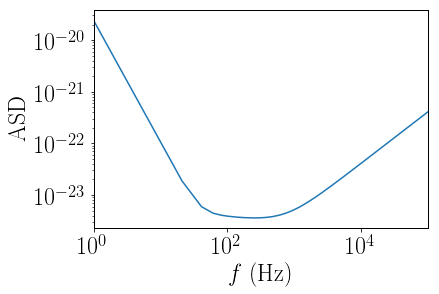

In [10]:
from lalsimulation import SimNoisePSDaLIGOZeroDetHighPower

flow = 1
fhig = 1E5
freqs = np.linspace(flow, fhig, 5000)

psd = np.array([SimNoisePSDaLIGOZeroDetHighPower(f) for f in freqs])
asd = psd**0.5

psd_interp = interp1d(freqs, psd)

fig, ax = plt.subplots(1)
ax.plot(freqs, asd)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(flow, fhig)
ax.set_xlabel(r'$f$ (Hz)')
ax.set_ylabel(r'ASD')
plt.show(fig)

In [11]:
# dfm = df_max[(df_max['h0']>0) & (~np.isnan(df_max['h0']) & (df_max['fgw']>0))].copy()

# dfm['dmax_design'] = horizon(dfm['h0'], dfm['fgw'], psd=SimNoisePSDaLIGOZeroDetHighPower)

# print dfm['dmax_design'].min()
# print dfm['dmax_design'].max()

In [12]:
## get git root dir
import subprocess
cmd = 'git rev-parse --show-toplevel'
call = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
gitdir, err = call.communicate()
if err:
    print err
    raise Exception('An error occurred while looking for root git dir')

# NOTE: could install the .dat files as package data, but seems like overkill
infodir = gitdir.strip() + '/etc/distancetool_data/'

#sampled universal antenna power pattern for code sped up
w_sample, P_sample= np.genfromtxt(infodir+"/Pw_single.dat",unpack=True)
P = interp1d(w_sample, P_sample, bounds_error=False, fill_value=0.0)


In [14]:
# get horizon

mbhs_horizon = np.logspace(np.log10(mbhs_array.min()), np.log10(mbhs_array.max()), 5)

horizons_mpc = []
for mbh in mbhs_horizon:
    horizons_mpc.append(find_horizon_range(0.5*mbh, 0.5*mbh, P=P, interpolate_psd=psd_interp, fmin=30, fmax=fhig)[0])

KeyboardInterrupt: 

In [ ]:
horizons_mpc

In [ ]:
# # colormap for peak h0 vs chi vs M

# from matplotlib import ticker

# #d = np.ma.masked_array(dfm['dmax_design'], dfm['dmax_design']<1E-3)
# d = dfm['dmax_design'] / (1E6 * physics.PC_SI)
# dmin, dmax = 1E-2, d.max()
# norm = matplotlib.colors.LogNorm(vmin=dmin, vmax=dmax)

# fig, ax = plt.subplots(1, figsize=(11,8))

# # plot contours
# cm = ax.hexbin(dfm['mbh'], dfm['chi'], C=d, cmap='magma', norm=norm,  xscale='log')

# # plot vertical line at 60 Msun
# ax.axvline(60, c='w', ls=':', lw=2)
# ax.axhline(0.7, c='w', ls=':', lw=2)

# # add colorbar
# #b_ticks = np.logspace(hmin, hmax, 7) # np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
# cb = plt.colorbar(cm, norm=norm, label=r'aLIGO design range (Mpc)')#, ticks=cb_ticks)
# cb.ax.tick_params(labelsize=18) 

# plt.ylabel(r'$\chi$')
# plt.xlabel(r'$M$ $(M_\odot)$')
# ax.patch.set_facecolor("grey")

# plt.xlim(30, 1E4)
# plt.ylim(0, 1)

# ax.tick_params(axis='both', color='0.4', which='both', width=2)
# ax.tick_params(axis='both', length=10)

# cm.set_rasterized(True)

# fig.savefig('cmap_chi_mbh_range-design.pdf', bbox_inches='tight', dpi=400)

# plt.show()
# plt.close()

### 3G detectors

In [ ]:
# load Voyager ASD
vals = np.loadtxt('noise_curves_T1500293-v10/voyager.txt')
freqs, asd_voy_array = vals[:,0], vals[:,1]

# create interpolant
asdv = interp1d(freqs, asd_voy_array)

fmin, fmax = freqs.min(), freqs.max()

asd = asdv(freqs)

fig, ax = plt.subplots(1)
ax.plot(freqs, asd)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(fmin, fmax)
ax.set_xlabel(r'$f$ (Hz)')
ax.set_ylabel(r'ASD')
plt.show(fig)

print fmin, fmax

In [ ]:
# remove freqs outside interp range
dfmv = dfm[(dfm['fgw']>fmin) & (dfm['fgw']<fmax)].copy()
dfmv['dmax_voyager'] = horizon(dfmv['h0'], dfmv['fgw'], asd=asdv(dfmv['fgw'].values))

print dfmv['dmax_voyager'].min()
print dfmv['dmax_voyager'].max()

In [ ]:
# # colormap for peak h0 vs chi vs M

# from matplotlib import ticker

# #d = np.ma.masked_array(dfm['dmax_design'], dfm['dmax_design']<1E-3)
# d = dfmv['dmax_voyager'] / (1E6 * physics.PC_SI)
# dmin, dmax = 1E-2, d.max()
# norm = matplotlib.colors.LogNorm(vmin=dmin, vmax=dmax)

# fig, ax = plt.subplots(1, figsize=(11,8))

# # plot contours
# cm = ax.hexbin(dfmv['mbh'], dfmv['chi'], C=d, cmap='magma', norm=norm,  xscale='log')

# # plot vertical line at 60 Msun
# ax.axvline(60, c='w', ls=':', lw=2)
# ax.axhline(0.7, c='w', ls=':', lw=2)

# # add colorbar
# #b_ticks = np.logspace(hmin, hmax, 7) # np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
# cb = plt.colorbar(cm, norm=norm, label=r'aLIGO design range (Mpc)')#, ticks=cb_ticks)
# cb.ax.tick_params(labelsize=18) 

# plt.ylabel(r'$\chi$')
# plt.xlabel(r'$M$ $(M_\odot)$')
# ax.patch.set_facecolor("grey")

# plt.xlim(10, 1E3)
# plt.ylim(0, 1)

# ax.tick_params(axis='both', color='0.4', which='both', width=2)
# ax.tick_params(axis='both', length=10)

# cm.set_rasterized(True)

# #fig.savefig('cmap_chi_mbh_h0max.pdf', bbox_inches='tight', dpi=400)

# plt.show()
# plt.close()